<a href="https://colab.research.google.com/github/BikramKC7/Machine-Learning/blob/main/Decision_Tree_Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Post Pruning Decision Tress with Cost Complexity Pruning**

DecisionTreeClassifier Provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost Complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here only the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores is shown below.

In [1]:
import sklearn
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [3]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [4]:
pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8811188811188811

[Text(0.5595238095238095, 0.9444444444444444, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.35714285714285715, 0.8333333333333334, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.45833333333333337, 0.8888888888888888, 'True  '),
 Text(0.23809523809523808, 0.7222222222222222, 'x[13] <= 42.19\ngini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.14285714285714285, 0.6111111111111112, 'x[25] <= 0.454\ngini = 0.032\nsamples = 247\nvalue = [4, 243]'),
 Text(0.09523809523809523, 0.5, 'x[21] <= 30.145\ngini = 0.024\nsamples = 246\nvalue = [3, 243]'),
 Text(0.047619047619047616, 0.3888888888888889, 'gini = 0.0\nsamples = 215\nvalue = [0, 215]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[14] <= 0.004\ngini = 0.175\nsamples = 31\nvalue = [3, 28]'),
 Text(0.09523809523809523, 0.2777777777777778, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.19047619047619047, 0.2777777777777778, 'x[1] <= 23.2\ngini = 0.067\nsamples = 29\nva

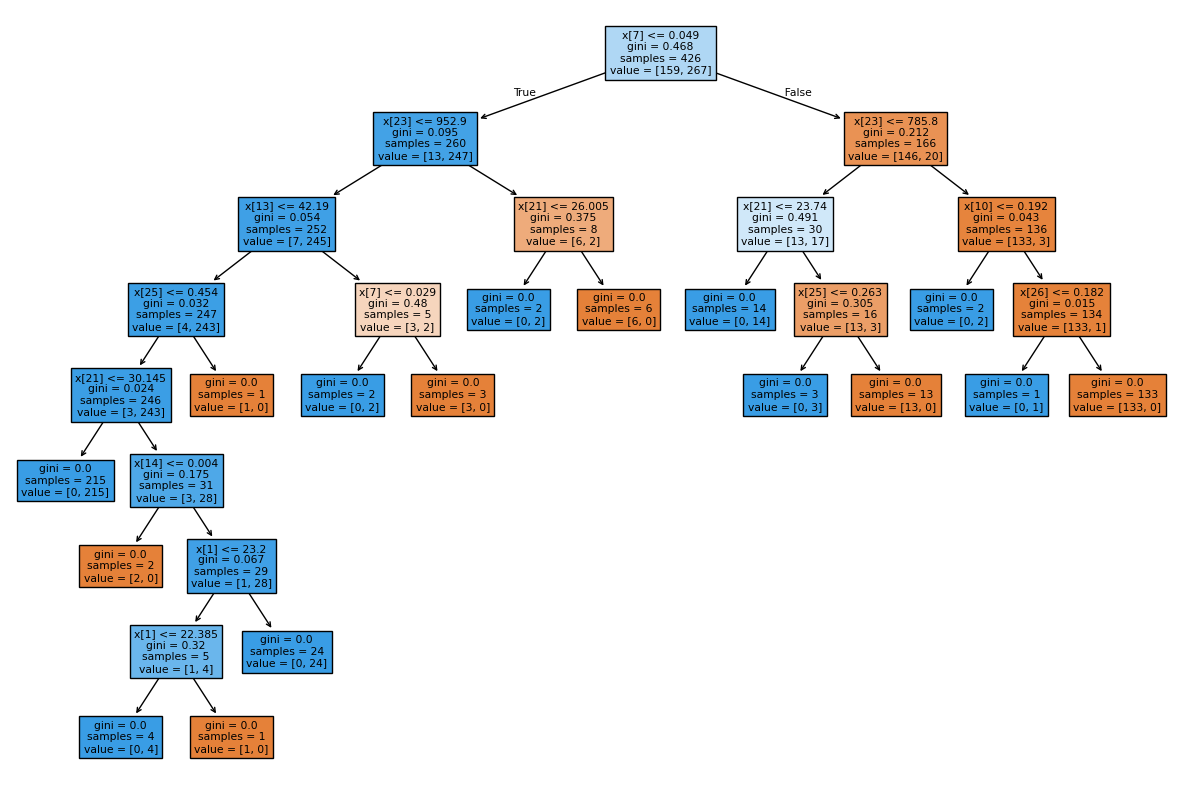

In [8]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)

In [9]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [10]:
ccp_alphas

array([0.        , 0.00226647, 0.00464743, 0.0046598 , 0.0056338 ,
       0.00704225, 0.00784194, 0.00911402, 0.01144366, 0.018988  ,
       0.02314163, 0.03422475, 0.32729844])

In [11]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
  clf.fit(X_train,y_train)
  clfs.append(clf)
print("Number of Nodes in the last tree is: {} with ccp_aplha: {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Number of Nodes in the last tree is: 1 with ccp_aplha: 0.3272984419327777


**Accuracy Vs Alpha for training and testing sets**

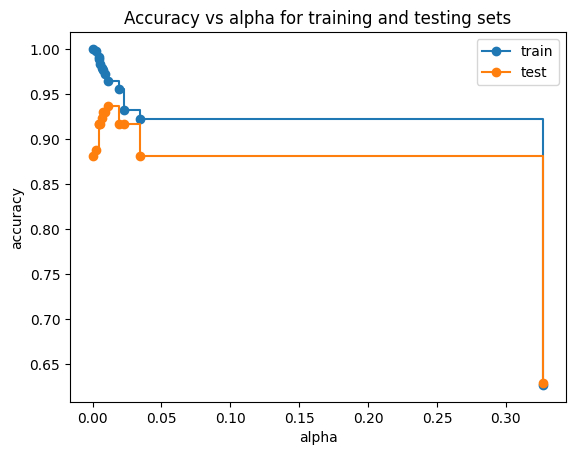

In [12]:
train_scores = [clf.score(X_train,y_train) for clf in clfs]
test_scores = [clf.score(X_test,y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas,train_scores,marker='o',label="train",drawstyle="steps-post")
ax.plot(ccp_alphas,test_scores,marker='o',label="test",drawstyle="steps-post")
ax.legend()
plt.show()

In [13]:
clf = DecisionTreeClassifier(random_state=0,ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [15]:
pred = clf.predict(X_test)
accuracy_score(y_test,pred)

0.9370629370629371

[Text(0.5, 0.875, 'x[7] <= 0.049\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.25, 0.625, 'x[23] <= 952.9\ngini = 0.095\nsamples = 260\nvalue = [13, 247]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'gini = 0.054\nsamples = 252\nvalue = [7, 245]'),
 Text(0.375, 0.375, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.75, 0.625, 'x[23] <= 785.8\ngini = 0.212\nsamples = 166\nvalue = [146, 20]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[21] <= 23.74\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.75, 0.125, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(0.875, 0.375, 'gini = 0.043\nsamples = 136\nvalue = [133, 3]')]

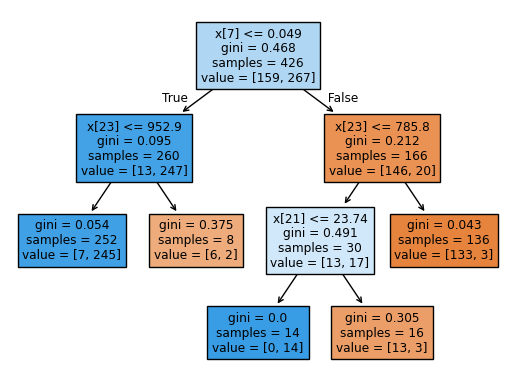

In [16]:
tree.plot_tree(clf,filled=True)